# 🧠 Employee Salary Prediction using Machine Learning
A complete step-by-step project using the Adult Income dataset. This project predicts whether a person earns more than 50K a year based on demographic data.

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Step 2: Upload and Load Dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('adult 3.csv')
df.head()

Saving adult 3.csv to adult 3.csv


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
# Step 3: Data Preprocessing
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
df.drop(['fnlwgt'], axis=1, inplace=True)
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,1,7,4,6,3,2,1,0,0,40,38,0
1,38,2,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,7,12,2,10,0,4,1,0,0,40,38,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,38,1
5,34,2,0,6,4,7,1,4,1,0,0,30,38,0


In [4]:
# Step 4: Splitting Dataset
X = df.drop('income', axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Step 5: Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

📊 Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6842
           1       0.72      0.61      0.66      2203

    accuracy                           0.85      9045
   macro avg       0.80      0.77      0.78      9045
weighted avg       0.84      0.85      0.84      9045



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


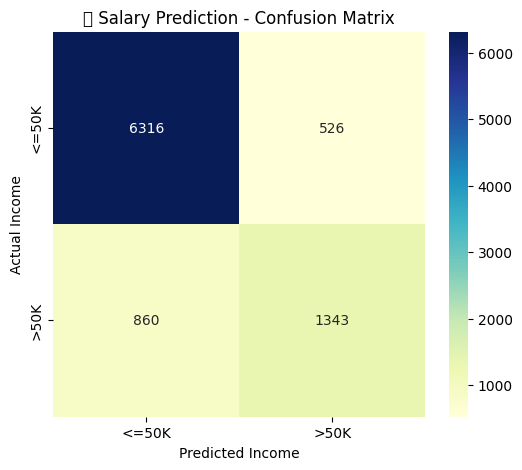

In [7]:
# Step 6: Evaluate Model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = model.predict(X_test)

# Print classification report
print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

# Generate and visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['<=50K', '>50K']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=labels, yticklabels=labels, cbar=True)

plt.xlabel('Predicted Income')
plt.ylabel('Actual Income')
plt.title('💼 Salary Prediction - Confusion Matrix')
plt.show()
